# Intro to text processing in Deep Learning

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
!gdown 1n37-Y82MzZ118UMXzxC3xbCfuBynW11X
!unzip -q txts.zip
!gdown 13g37PZoSriKYUv5M8jjw2NIaLYxPwfgD
!unzip -q txts_sk.zip


Downloading...
From: https://drive.google.com/uc?id=1n37-Y82MzZ118UMXzxC3xbCfuBynW11X
To: /content/txts.zip
100% 3.53M/3.53M [00:00<00:00, 163MB/s]
Downloading...
From: https://drive.google.com/uc?id=13g37PZoSriKYUv5M8jjw2NIaLYxPwfgD
To: /content/txts_sk.zip
100% 220M/220M [00:02<00:00, 84.7MB/s]


A language model is a model that has been trained to guess what the next word in a text is (having read the ones before) . . .

# How to input text to Neural Networks?

It's very good question because as we know it; NN works with vectors.

Another problem is that sentences can have different lengths, and documents can be very long and made of sentences of different lengths. 

* Tokenization: Convert the text into a list of words

* Numericalization: Make a list of all of the unique words that appear (the vocabulary or sometimes called dictionnary), and convert each word into a number, by looking up its index in the vocabulary/dictionnary

* Data loader creation: class which automatically handles creating a dependent variable that is offset from the independent variable by one token. 

* Language Model creation: We need a special kind of model that handles input lists which could be arbitrarily big or small. In this lab we will use a recurrent neural network (RNN). 

## Tokenization

Tokenization is the process of converting sentences into tokens. This process can differ for every languages. For eg in German or in Polish, we can create really long words from many, many pieces.
Japanese and Chinese don't really have a well-defined concept of word.
Therefore there are multiple strategy for tokenization:
* Word-based: Split a sentence on spaces, as well as applying language-specific rules to try to separate parts of meaning even when there are no spaces (such as turning "don't" into "do n't"). Generally, punctuation marks are also split into separate tokens.
* Subword based: Split words into smaller parts, based on the most commonly occurring substrings. For instance, "occasion" might be tokenized as "o c ca sion."
* Character-based: Split a sentence into its individual characters.


### Wordbased

In [2]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
import numpy as np
nlp = English()
# Create a blank Tokenizer with just the English vocab
tokenizer = Tokenizer(nlp.vocab)

In [3]:
tokens = tokenizer("This is a sentence")
list(tokens)

[This, is, a, sentence]

### Subword Based

Here we use a subword tokenization algorithms. Subword tokenization algorithms rely on the principle that most common words should be left as is, but rare words should be decomposed in meaningful subword units. For instance “annoyingly” might be considered a rare word and decomposed as “annoying” and “ly”. This is especially useful in agglutinative languages such as Turkish, where you can form (almost) arbitrarily long complex words by stringing together some subwords.

In [20]:
from pathlib import Path
!pip install tokenizers
from tokenizers import BertWordPieceTokenizer
paths = [str(x) for x in Path("sk").glob("**/*.txt")]
vocabulary_size=52_000

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
['sk/5254321.txt', 'sk/4667620.txt', 'sk/3984514.txt', 'sk/6936312.txt', 'sk/6169201.txt', 'sk/7054246.txt', 'sk/3961189.txt', 'sk/6374205.txt', 'sk/10939.txt', 'sk/3928354.txt', 'sk/6267866.txt', 'sk/5545657.txt', 'sk/3085510.txt', 'sk/6411513.txt', 'sk/5563664.txt', 'sk/6440586.txt', 'sk/108130.txt', 'sk/112785.txt', 'sk/5655526.txt', 'sk/5211008.txt', 'sk/6564153.txt', 'sk/6331069.txt', 'sk/5545707.txt', 'sk/31059.txt', 'sk/4260594.txt', 'sk/4111832.txt', 'sk/6875648.txt', 'sk/4965436.txt', 'sk/5532821.txt', 'sk/5529183.txt', 'sk/119245.txt', 'sk/5725364.txt', 'sk/4210589.txt', 'sk/3113107.txt', 'sk/6203890.txt', 'sk/4003790.txt', 'sk/3544658.txt', 'sk/7026820.txt', 'sk/6125368.txt', 'sk/6745907.txt', 'sk/4283167.txt', 'sk/5741303.txt', 'sk/3576310.txt', 'sk/3672489.txt', 'sk/4799644.txt', 'sk/5625175.txt', 'sk/3845613.txt', 'sk/3529243.txt', 'sk/4887781.txt', 'sk/3152202.txt', 'sk/410

In [21]:
tokenizer = BertWordPieceTokenizer()

In [22]:
# Customize training
tokenizer.train(files=paths, vocab_size=vocabulary_size, min_frequency=3, special_tokens=[
    "<s>",
    "<pad>",
    "</s>",
    "<unk>",
    "<mask>",
])
#tokenizer.save("./data/model/robert-subword2", pretty=True)

In [23]:
encoded = tokenizer.encode("It's wednesday my dude!")
encoded.tokens

['it', "'", 's', 'wed', '##nes', '##day', 'my', 'dud', '##e', '!']

### Characters based

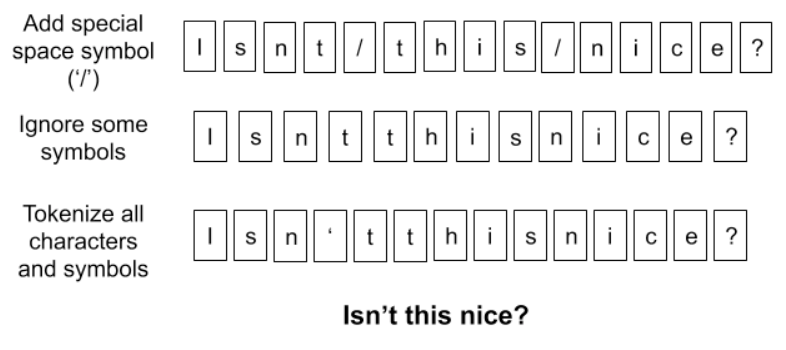

In [ ]:
from IPython.display import Image
Image(filename="data/images/chars-tokenization.png")

In [24]:
from tokenizers import CharBPETokenizer
tokenizer2 = CharBPETokenizer()
# Customize training
tokenizer2.train(files=paths, vocab_size=vocabulary_size, min_frequency=3, special_tokens=[
    "<s>",
    "<pad>",
    "</s>",
    "<unk>",
    "<mask>",
])
#tokenizer2.save("./data/model/robert-charbpe2", pretty=True)

In [25]:
encoded = tokenizer2.encode("It's wednesday my dude!")
encoded.tokens

['It</w>',
 "'</w>",
 's</w>',
 'w',
 'ed',
 'nes',
 'day</w>',
 'my</w>',
 'du',
 'de</w>',
 '!</w>']

## Numericalization

Numericalization is the process of mapping tokens to integers.

  * Build a dictionnary/vocabulary
  * Replace each level with its index in the dictionnary.

Earlier when we called train on our corpus. What we did is:
  * Parse our corpus
  * Tokenize it
  * Build a dictionnary  

In [10]:
encoded.ids

[648, 282, 208, 4191, 10930, 445, 636, 467, 287]

In [11]:
encoded.tokens

['It</w>',
 "'</w>",
 's</w>',
 'wed',
 'nesday</w>',
 'my</w>',
 'du',
 'de</w>',
 '!</w>']

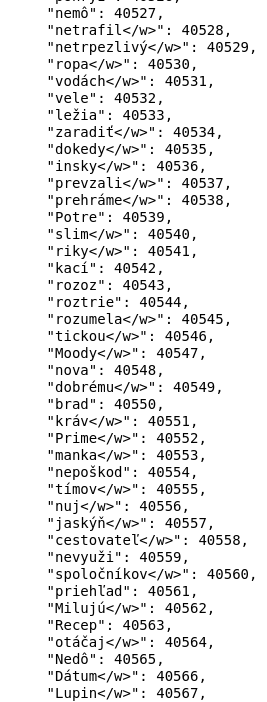

In [ ]:
Image(filename="data/images/slovak dict.png")

## Entity Embedding

The numerical data we have right now can be directly fed to the model (with some optional preprocessing). However those number does not encode any meaningful semantics for our model. 
In an ideal world, we would like to represent each word with for e.g. a 300 dimension vector where each number represent something.

$$q_\text{politician} = \left[ \overbrace{2.3}^\text{can run}, \overbrace{5.3}^\text{likes to lie},  
\overbrace{9.4}^\text{likes coffee}, \dots \right]$$

This notion permit us to so math with words.
Pretty cool right.

### Let's try with a pretrained model

In [18]:
import spacy
spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
nlp.vocab["bicycle"].vector

In [20]:
nlp.vocab["bicycle"].vector.shape

(300,)

In [21]:
vec = nlp.vocab["bicycle"].vector + nlp.vocab["engine"].vector + nlp.vocab["helmet"].vector

In [ ]:
vec

In [23]:
ms = nlp.vocab.vectors.most_similar(
    np.asarray([vec]), n=10, sort=True)
words = set([nlp.vocab.strings[w].lower() for w in ms[0][0]])
print(words)

{'engine', 'bicycle', 'quadricycle', 'wheelset', 'tricycle', 'motorglider', 'motorcycle', 'motorbike', 'motorcycles', 'motorcyle'}


In [ ]:
vec = nlp.vocab["car"].vector - nlp.vocab["tires"].vector + 2 * nlp.vocab["wing"].vector + nlp.vocab["kerosene"].vector
ms = nlp.vocab.vectors.most_similar(
    np.asarray([vec]), n=10, sort=True)
words = set([nlp.vocab.strings[w].lower() for w in ms[0][0]])
print(words)

{'flying', 'wings', 'wing', 'airplane'}


In [ ]:
vec = nlp.vocab["flamethrower"].vector - nlp.vocab["flame"].vector + nlp.vocab["water"].vector
ms = nlp.vocab.vectors.most_similar(
    np.asarray([vec]), n=10, sort=True)
words = set([nlp.vocab.strings[w].lower() for w in ms[0][0]])
print(words)

{'water', 'seawater', 'sewage', 'rainwater'}


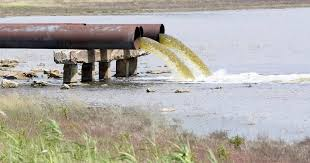

In [ ]:
Image(filename="data/images/sewage.jpeg")

In [ ]:
vec = nlp.vocab["flamethrower"].vector - nlp.vocab["gun"].vector 
ms = nlp.vocab.vectors.most_similar(
    np.asarray([vec]), n=10, sort=True)
words = set([nlp.vocab.strings[w].lower() for w in ms[0][0]])
print(words)

{'flamethrowing', 'flamethrower', 'sandworm', 'venusaur', 'fireblast'}


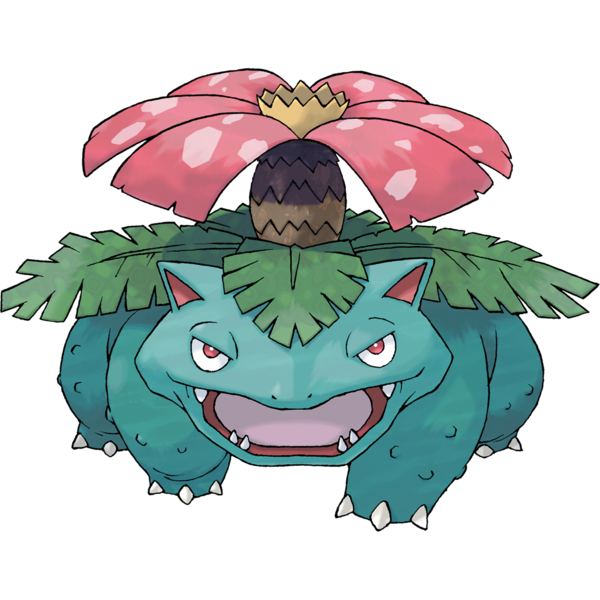

In [ ]:
Image(filename="data/images/venusaur.png")

At the beginning we will initialize those number randomly. Therefore when we train our model, it will optimize at the same time the meaning of the word. In our case find the proper vector that represents a word.

So how do we generate our embedding vector ?
Simple:
    1. Convert our encoded input to one hot encoded vector
    2. Pass it through a Linear layer
Most DL framework implement this through Embedding layer so you don't have to do it manualy.  

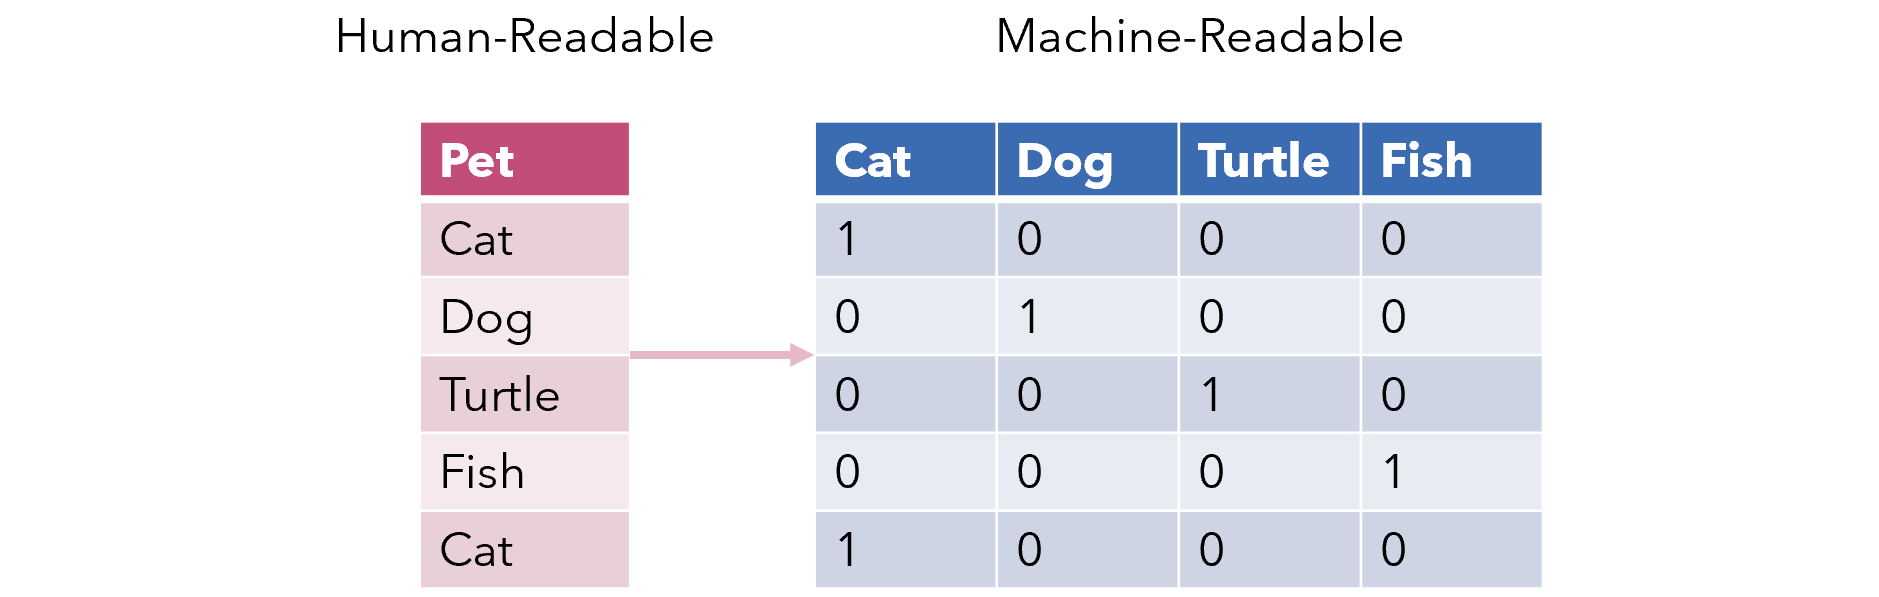

In [ ]:
Image(filename="./data/images/onehot.png")

Now we know how to process our data. Let's send it to our network.

# RNN

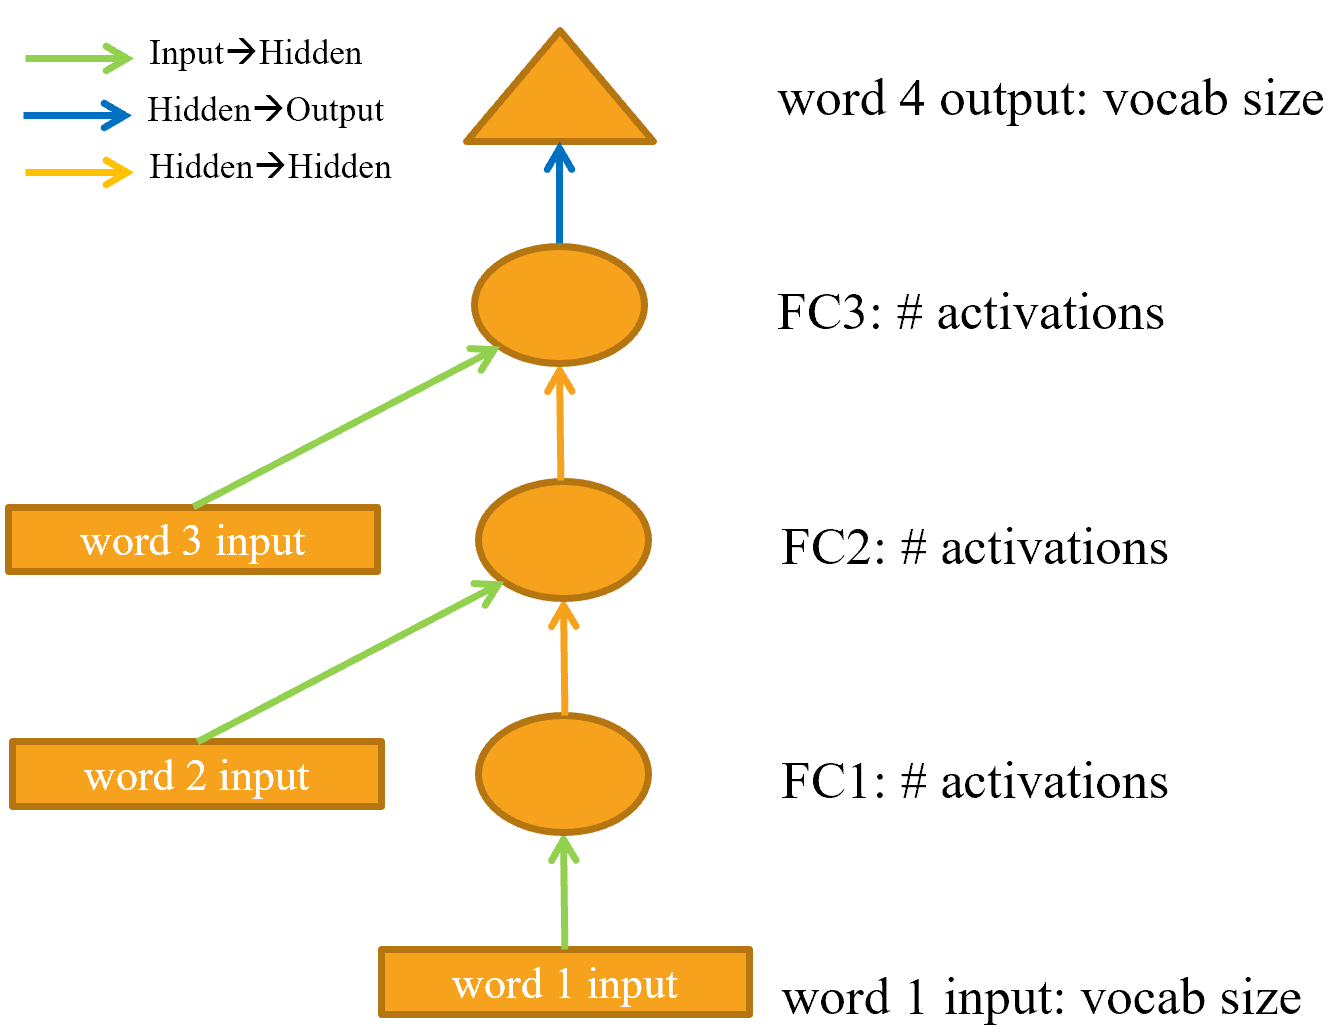

In [ ]:
Image(filename="./data/images/simplernn.png")

In [4]:
from keras.utils import to_categorical
from keras.utils.data_utils import get_file
from keras.models import Sequential, load_model
from keras.layers import Embedding, LSTM, Dense, SimpleRNN
from keras.callbacks import EarlyStopping, ModelCheckpoint

Let's take the subtitle of 6 randoms movies/tv shows in Slovak.

In [26]:
paths_sk = [str(x) for x in Path("sk").glob("**/*.txt")]
raw_text = ""
for i in range(6):
    with open(paths_sk[i], encoding = 'utf-8') as f:
        raw_text += f.read().replace('--', ' ').replace('-', ' ').replace('\n', ' ')

In [27]:
print('corpus length:', len(raw_text))
print('example text:', raw_text[5:100])

corpus length: 145165
example text: ávač : rok1453. zkrajín Konštantinopolu,  mocnásila osmanskýmTurkom zamiesťcezRumunsko, ohrozuj


In [ ]:
enc = tokenizer.encode(raw_text)
enc.tokens

In [ ]:
enc.ids

In [29]:
step = 3
maxlen = 40
X = []
y = []
for i in range(0, len(enc.tokens) - maxlen, step):
    sentence = enc.tokens[i:i + maxlen]
    next_word = enc.tokens[i + maxlen]
    X.append([tokenizer.token_to_id(token) for token in sentence])
    y.append(tokenizer.token_to_id(next_word))

# keras expects the target to be in one-hot encoded format,
# ideally we would use a generator that performs this conversion
# only on the batch of data that is currently required by the model
# to be more memory-efficient
X = np.array(X)
Y = to_categorical(y, vocabulary_size)
print('sequence dimension: ', X.shape)
print('target dimension: ', Y.shape)
print('example sequence:\n', X[0])

sequence dimension:  (11778, 40)
target dimension:  (11778, 52000)
example sequence:
 [36312    29  1628 24601   505   504    17    65  1123 28973 22289 26684
 32848    15 21629  2731 49574 18123   489   969  2479   650 21073 19530
   482   478  5722  2924  1347    15 24434 33704  1173 10181  1302   692
  8888  1732    17 14647]


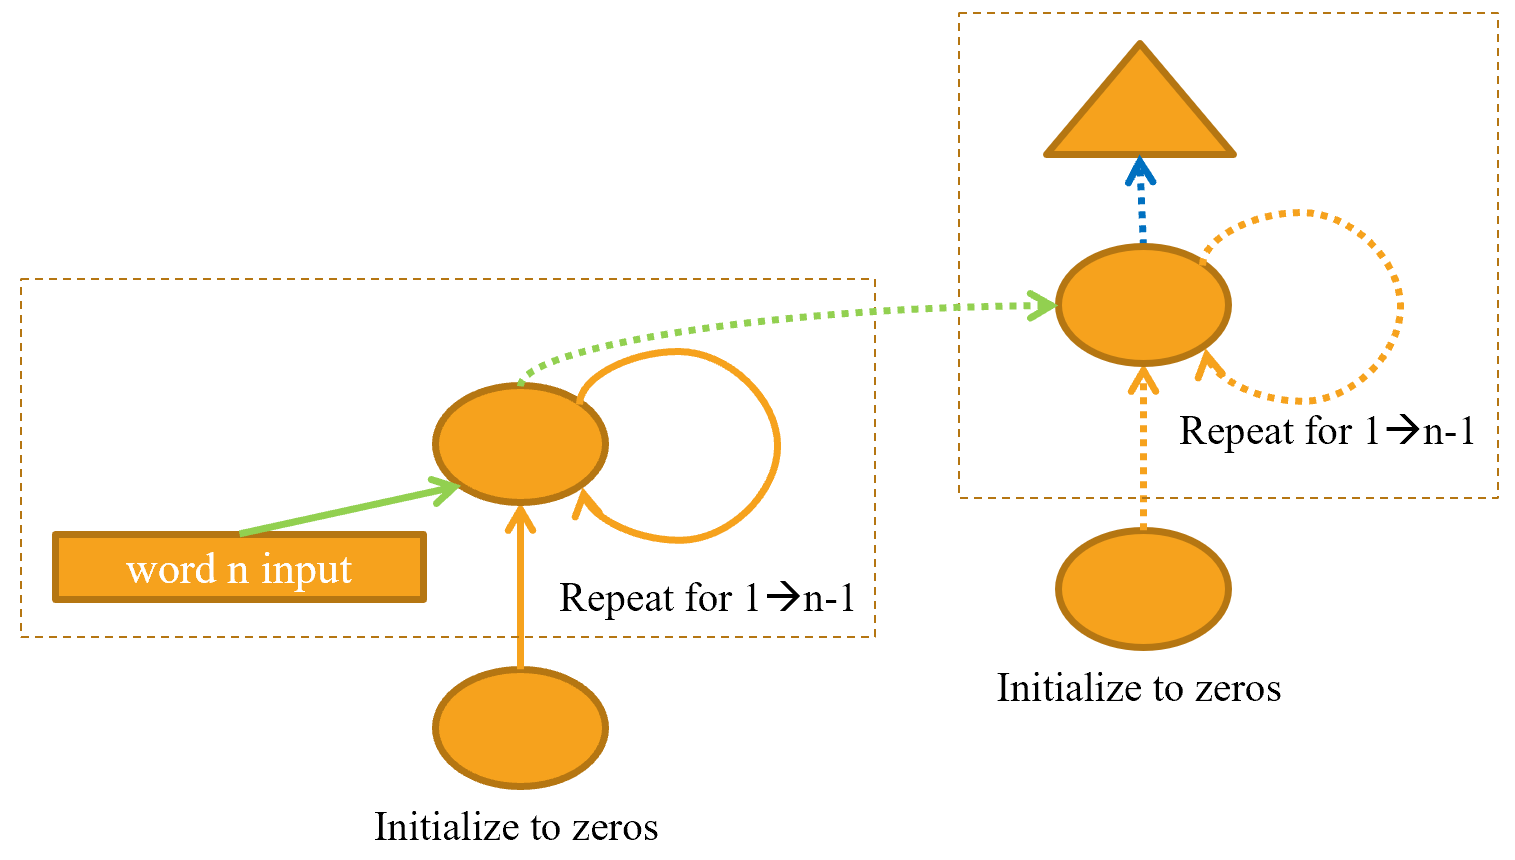

In [ ]:
Image(filename="./data/images/att_00025.png")

In [30]:
# define the network architecture: a embedding followed by LSTM
embedding_size = 50
rnn_size = 256
model1 = Sequential()
model1.add(Embedding(vocabulary_size, embedding_size))
model1.add(SimpleRNN(rnn_size))
model1.add(Dense(vocabulary_size, activation = 'softmax'))
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam')
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          2600000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 256)               78592     
                                                                 
 dense (Dense)               (None, 52000)             13364000  
                                                                 
Total params: 16,042,592
Trainable params: 16,042,592
Non-trainable params: 0
_________________________________________________________________


In [31]:
epochs = 10
batch_size = 64
validation_split = 0.2
history = model1.fit(X, Y, batch_size = batch_size, epochs = epochs, verbose = 1, validation_split = validation_split)

Epoch 1/10
148/148 [==============================] - 48s 312ms/step - loss: 7.9568 - val_loss: 7.3535
Epoch 2/10
148/148 [==============================] - 42s 282ms/step - loss: 6.7346 - val_loss: 7.9073
Epoch 3/10
148/148 [==============================] - 42s 287ms/step - loss: 6.6355 - val_loss: 9.0260
Epoch 4/10
148/148 [==============================] - 42s 282ms/step - loss: 6.4485 - val_loss: 8.0317
Epoch 5/10
148/148 [==============================] - 42s 283ms/step - loss: 6.2149 - val_loss: 8.0518
Epoch 6/10
148/148 [==============================] - 43s 288ms/step - loss: 5.9373 - val_loss: 8.0677
Epoch 7/10
148/148 [==============================] - 52s 354ms/step - loss: 5.6447 - val_loss: 8.2387
Epoch 8/10
148/148 [==============================] - 44s 299ms/step - loss: 5.3395 - val_loss: 8.3070
Epoch 9/10
148/148 [==============================] - 42s 285ms/step - loss: 5.0474 - val_loss: 8.4200
Epoch 10/10
148/148 [==============================] - 42s 285ms/step - l

In [32]:
def check_prediction(model, num_predict):
    for i in range(num_predict):
        x = X[i]
        prediction = model.predict(x[np.newaxis, :], verbose = 0)
        index = np.argmax(prediction)
        print(" ".join([tokenizer.id_to_token(i) for i in x]))
        print('Actual words: ', tokenizer.id_to_token(y[i]))
        print('Predicted words: ', tokenizer.id_to_token(index))
        print("#################################################")
num_predict = 5
check_prediction(model1, num_predict)

rozpravac : rok ##14 ##5 ##3 . z ##kra ##jin konstan ##tino ##polu , mocna ##sila osma ##nsky ##m ##tu ##rk ##om zamies ##tc ##e ##z ##rum ##un ##sko , ohrozuje ##sam ##ot ##nus ##rd ##ce krestan ##stva . zp
Actual words:  ##op
Predicted words:  to
#################################################
##14 ##5 ##3 . z ##kra ##jin konstan ##tino ##polu , mocna ##sila osma ##nsky ##m ##tu ##rk ##om zamies ##tc ##e ##z ##rum ##un ##sko , ohrozuje ##sam ##ot ##nus ##rd ##ce krestan ##stva . zp ##op ##ola nicenia
Actual words:  ##vz
Predicted words:  vrecka
#################################################
. z ##kra ##jin konstan ##tino ##polu , mocna ##sila osma ##nsky ##m ##tu ##rk ##om zamies ##tc ##e ##z ##rum ##un ##sko , ohrozuje ##sam ##ot ##nus ##rd ##ce krestan ##stva . zp ##op ##ola nicenia ##vz ##nik ##li
Actual words:  mlady
Predicted words:  ##hryz
#################################################
##jin konstan ##tino ##polu , mocna ##sila osma ##nsky ##m ##tu ##rk ##om zamies ##tc

## Exploding or Vanishing 

In practice, creating accurate models from this kind of RNN is difficult. The reason this is challenging is because of what happens when you multiply by a matrix multiples times. For example, if you multiply by 2, starting at 1, you get the sequence 1, 2, 4, 8,... after 32 steps you are already at 4,294,967,296. A similar issue happens if you multiply by 0.5: you get 0.5, 0.25, 0.125… and after 32 steps it's 0.00000000023. As you can see, multiplying by a number even slightly higher or lower than 1 results in an explosion or disappearance of our starting number, after just a few repeated multiplications.

This is a problem, because the way computers store numbers (known as "floating point") means that they become less and less accurate the further away the numbers get from zero.

This inaccuracy means that often the gradients calculated for updating the weights end up as zero or infinity for deep networks.

# LSTM

In practice, RNNs are really bad at retaining memory of what happened much earlier in the sentence that's why LSTM was introduced back in 1997 by Jürgen Schmidhuber and Sepp Hochreiter

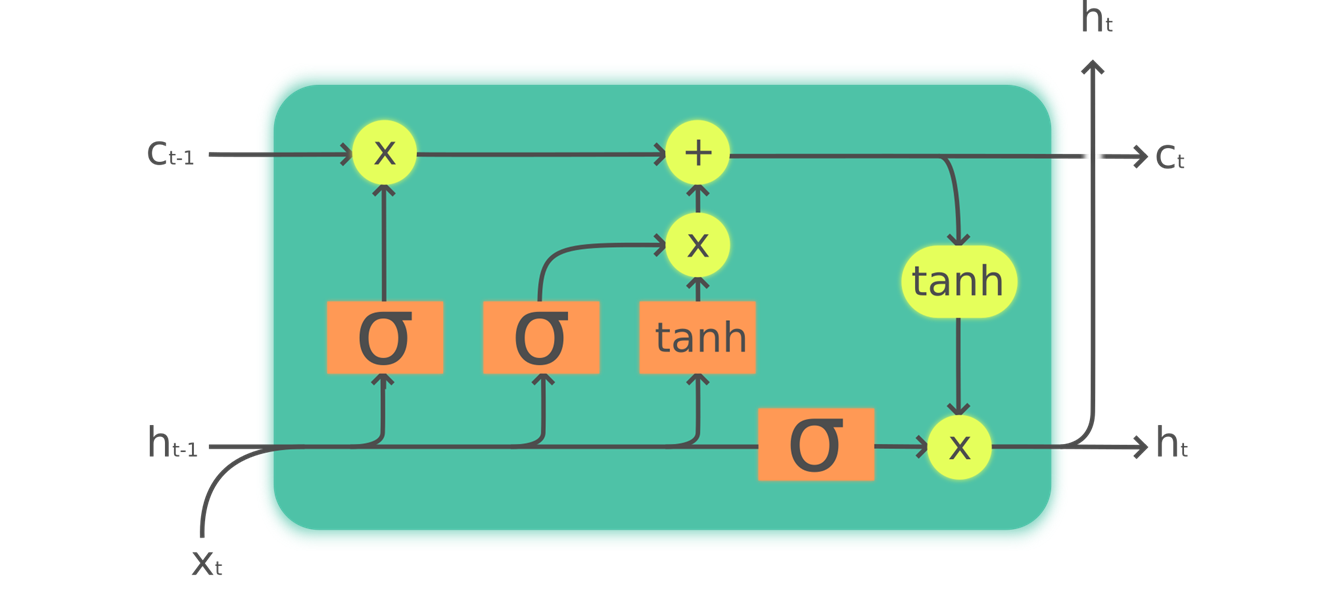

In [ ]:
Image(filename="./data/images/LSTM.png")

In [ ]:
# define the network architecture: a embedding followed by LSTM
embedding_size = 50
lstm_size = 256
model1 = Sequential()
model1.add(Embedding(vocabulary_size, embedding_size))
model1.add(LSTM(lstm_size, return_sequences = True))
model1.add(LSTM(lstm_size))
model1.add(Dense(vocabulary_size, activation = 'softmax'))
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam')
model1.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 50)          2600000   
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 256)         314368    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_2 (Dense)              (None, 52000)             13364000  
Total params: 16,803,680
Trainable params: 16,803,680
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model1.fit(X, Y, batch_size = batch_size, epochs = epochs, verbose = 1, validation_split = validation_split)

Train on 8199 samples, validate on 2050 samples
Epoch 1/10
8199/8199 [==============================] - 15s 2ms/step - loss: 7.8344 - val_loss: 8.0156
Epoch 2/10
8199/8199 [==============================] - 15s 2ms/step - loss: 6.4038 - val_loss: 8.4149
Epoch 3/10
8199/8199 [==============================] - 15s 2ms/step - loss: 6.3652 - val_loss: 8.6423
Epoch 4/10
8199/8199 [==============================] - 15s 2ms/step - loss: 6.3625 - val_loss: 8.7905
Epoch 5/10
8199/8199 [==============================] - 15s 2ms/step - loss: 6.3496 - val_loss: 8.8603
Epoch 6/10
8199/8199 [==============================] - 15s 2ms/step - loss: 6.3394 - val_loss: 8.8041
Epoch 7/10
8199/8199 [==============================] - 15s 2ms/step - loss: 6.2990 - val_loss: 8.1403
Epoch 8/10
8199/8199 [==============================] - 15s 2ms/step - loss: 6.2268 - val_loss: 8.1698
Epoch 9/10
8199/8199 [==============================] - 15s 2ms/step - loss: 6.1898 - val_loss: 8.3917
Epoch 10/10
8199/8199 [==

In [ ]:
check_prediction(model1, num_predict)

sorry , ze meskam . je mi luto ! dobre , radsej sa hyb ! diky . ake mile ! vsetko najlepsie ! pockajte , ukazem vam nieco ! aha , toto mam od timi ##ho . mas este blo
Actual words:  ##cek
Predicted words:  .
#################################################
meskam . je mi luto ! dobre , radsej sa hyb ! diky . ake mile ! vsetko najlepsie ! pockajte , ukazem vam nieco ! aha , toto mam od timi ##ho . mas este blo ##cek ? dakujem
Actual words:  .
Predicted words:  .
#################################################
mi luto ! dobre , radsej sa hyb ! diky . ake mile ! vsetko najlepsie ! pockajte , ukazem vam nieco ! aha , toto mam od timi ##ho . mas este blo ##cek ? dakujem . a toto
Actual words:  je
Predicted words:  .
#################################################
dobre , radsej sa hyb ! diky . ake mile ! vsetko najlepsie ! pockajte , ukazem vam nieco ! aha , toto mam od timi ##ho . mas este blo ##cek ? dakujem . a toto je od nas
Actual words:  vsetkych
Predicted words:  .
#############

# Exercise

* Experiment with vector mathematics of english language embeddings. At least 5 equations.
* Improve the data processing and NN of this code

# Resources

* https://arxiv.org/abs/1708.02182
* https://towardsdatascience.com/illustrated-guide-to-recurrent-neural-networks-79e5eb8049c9
* https://jalammar.github.io/illustrated-transformer/
* https://blog.floydhub.com/tokenization-nlp/